In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import zconfint
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Load data

In [48]:
data = datasets.load_iris()

random_state = 9
np.random.seed(random_state)

X_raw = data['data']
y_raw = data['target'].reshape(-1, 1)

for k in range(40):
    i = np.random.randint(0, 150)
    j = np.random.randint(0, 4)
    X_raw[i, j] = None
    
df = pd.DataFrame(np.hstack([X_raw, y_raw]),
                  columns = data['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,NaN,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    135 non-null float64
sepal width (cm)     140 non-null float64
petal length (cm)    143 non-null float64
petal width (cm)     143 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [52]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,135.000000,140.000000,143.000000,143.000000,150.000000
mean,5.831852,3.064286,3.801399,1.184615,1.000000
std,0.836272,0.438616,1.757038,0.755944,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.400000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [54]:
df.isnull().sum()/len(df)

sepal length (cm)    0.100000
sepal width (cm)     0.066667
petal length (cm)    0.046667
petal width (cm)     0.046667
target               0.000000
dtype: float64

Visual

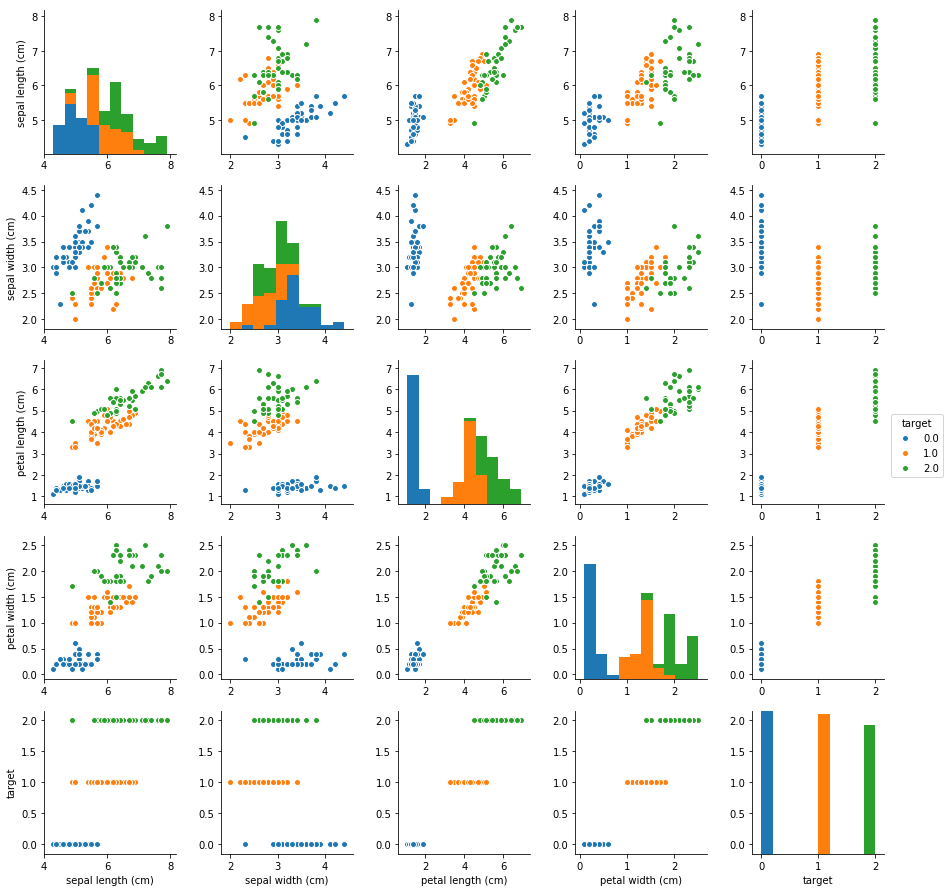

In [74]:
visual_df = df.dropna()
sns.pairplot(visual_df, hue='target')

plt.show()

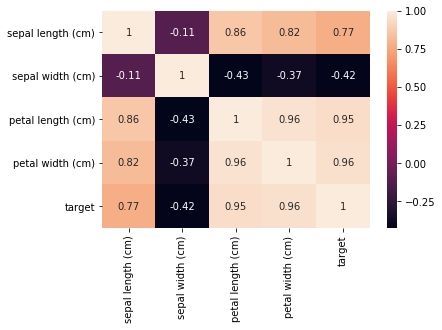

In [79]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Hypothesis testing

In [81]:
XPL0 = df[df['target'] == 0]['petal length (cm)'].dropna()
XPL1 = df[df['target'] == 1]['petal length (cm)'].dropna()
XPL2 = df[df['target'] == 2]['petal length (cm)'].dropna()

Means:

In [83]:
print('petal length with t=0 mean:', XPL0.mean())
print('petal length with t=1 mean:', XPL1.mean())
print('petal length with t=2 mean:', XPL2.mean())

petal length with t=0 mean: 1.4630434782608694
petal length with t=1 mean: 4.25625
petal length with t=2 mean: 5.551020408163264


z-conf intervals for means:

In [106]:
print('petal length with t=0 mean conf interval:', zconfint(XPL0))
print('petal length with t=1 mean conf interval:', zconfint(XPL1))
print('petal length with t=2 mean conf interval:', zconfint(XPL2))

petal length with t=0 mean conf interval: (1.4112203910898795, 1.5148665654318594)
petal length with t=1 mean conf interval: (4.122167548106801, 4.3903324518931983)
petal length with t=2 mean conf interval: (5.3949036646341888, 5.7071371516923435)


H0: mean of 'petal length' target classes 0 and 1 are equal 

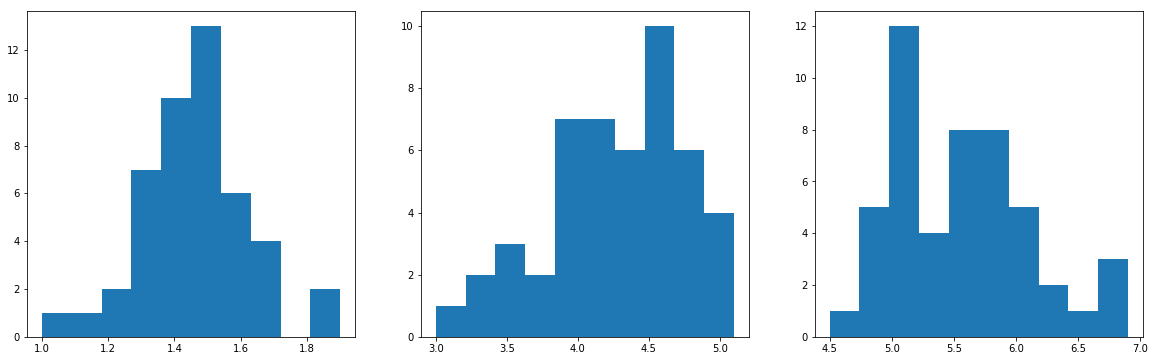

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].hist(XPL0)
axes[1].hist(XPL1)
axes[2].hist(XPL2)

plt.show()

Normality hypothesis testing:

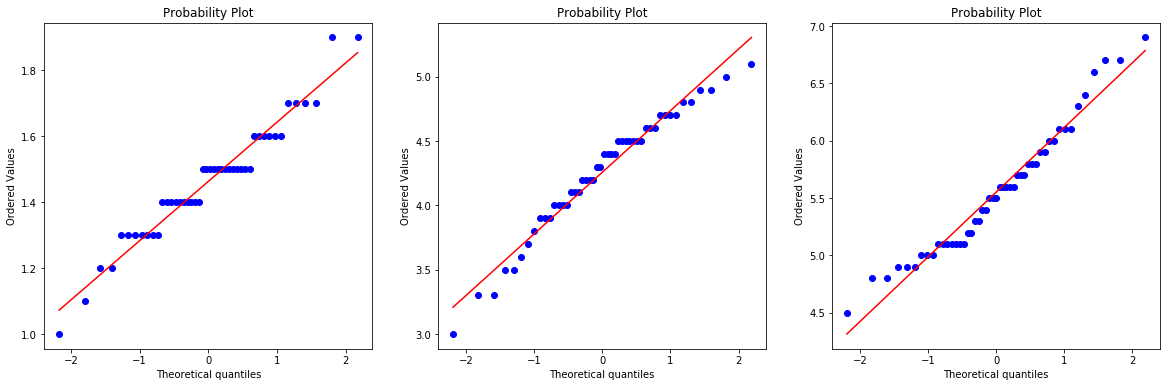

Shapiro-Wilk test for petal length with t=0: (0.9585959911346436, 0.10108213126659393)
Shapiro-Wilk test for petal length with t=1: (0.96644526720047, 0.18344837427139282)
Shapiro-Wilk test for petal length with t=2: (0.9612790942192078, 0.10694928467273712)


In [101]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

stats.probplot(XPL0, dist='norm', plot=axes[0])
stats.probplot(XPL1, dist='norm', plot=axes[1])
stats.probplot(XPL2, dist='norm', plot=axes[2])

plt.show()

print('Shapiro-Wilk test for petal length with t=0:', stats.shapiro(XPL0))
print('Shapiro-Wilk test for petal length with t=1:', stats.shapiro(XPL1))
print('Shapiro-Wilk test for petal length with t=2:', stats.shapiro(XPL2))

Data is normal, t-test will be applied

In [109]:
print('T-test for 0-1', stats.ttest_ind(XPL0, XPL1))
print('T-test for 0-2', stats.ttest_ind(XPL0, XPL2))
print('T-test for 1-2', stats.ttest_ind(XPL1, XPL2))

T-test for 0-1 Ttest_indResult(statistic=-37.475382986894559, pvalue=1.6380620467134674e-57)
T-test for 0-2 Ttest_indResult(statistic=-47.461966273917284, pvalue=5.5264526150800962e-67)
T-test for 1-2 Ttest_indResult(statistic=-12.310700221830478, pvalue=2.1925447833399403e-21)


Modeling

In [141]:
X = df.drop(['target'], axis=1)
y = df['target'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, shuffle=True, stratify=y, 
                                                    random_state=random_state)

130    2
37     0
115    2
41     0
125    2
86     1
24     0
74     1
96     1
21     0
81     1
144    2
120    2
36     0
99     1
17     0
5      0
79     1
90     1
42     0
38     0
123    2
114    2
10     0
73     1
140    2
142    2
92     1
11     0
7      0
      ..
127    2
23     0
85     1
75     1
104    2
149    2
39     0
71     1
128    2
100    2
113    2
52     1
78     1
60     1
45     0
3      0
107    2
46     0
135    2
6      0
136    2
133    2
30     0
108    2
134    2
83     1
64     1
82     1
98     1
62     1
Name: target, Length: 120, dtype: int32

In [138]:
def get_pipeline(model):
    
    pipeline = Pipeline(steps=[
        ('missings', Imputer(strategy='mean')),
        ('scaling', StandardScaler()),
        ('model', model)
    ])
    
    return pipeline

In [152]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

model = DecisionTreeClassifier(random_state=random_state)
pipeline = get_pipeline(model)
params = { 'model__max_depth': [2, 5, 10, 15, 25, 100, 1000] }
grid = GridSearchCV(pipeline, params, cv=cv, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'model__max_depth': 5}
0.916666666667


final score:

In [153]:
best_model = grid.best_estimator_

In [155]:
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.96666666666666667